In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),    # Convert the image to a PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))    # Normalize the tensor to range [-1, 1]
])


In [3]:
# Create training set and define training dataloader
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)


0.3%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



2.0%

100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [4]:
# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

ToTensor(): A critical preprocessing step for transforming picture data into a PyTorch tensor is the ToTensor() transform. The main data format for computing in the PyTorch and deep learning frameworks is PyTorch tensors. We can execute mathematical operations on the images and effectively train neural networks by using PyTorch's robust GPU acceleration by converting the images to tensors.

Normalization: Improving the training and convergence of neural networks through normalization is an important preprocessing step. Normalization reduces the pixel values in image data to a standard range, typically [0, 1] or [-1, 1]. According to MNIST, the normalization normally entails dividing the pixel values by 255 (the highest pixel value in the grayscale image), which yields pixel values between 0 and 1. Bringing about the

In [18]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show4(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

9


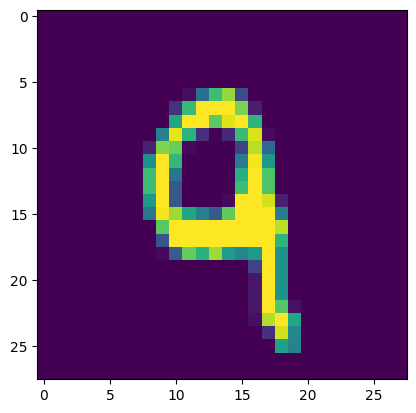

7


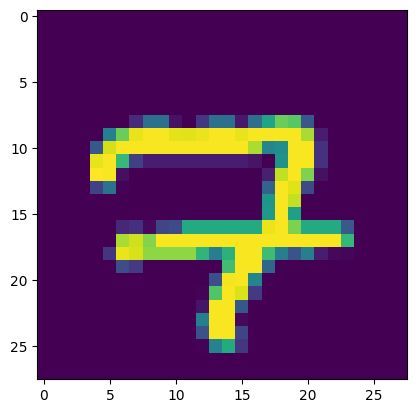

2


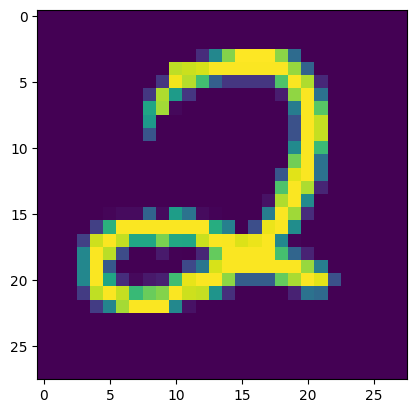

6


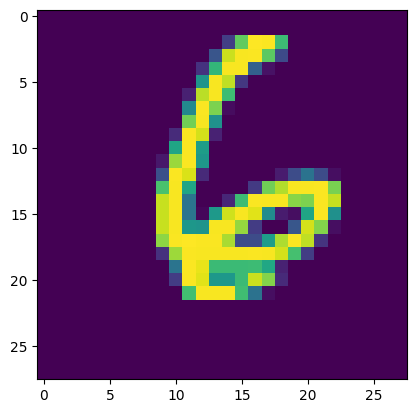

1


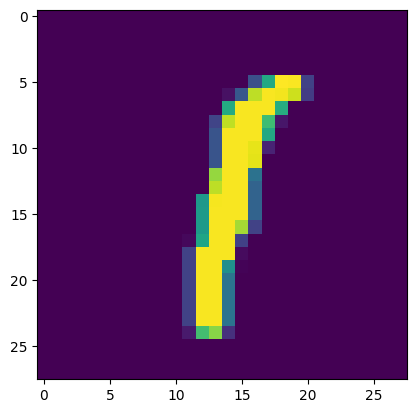

7


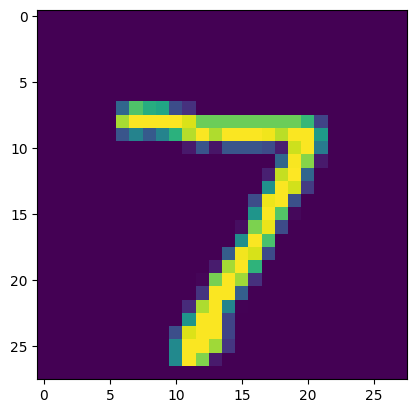

2


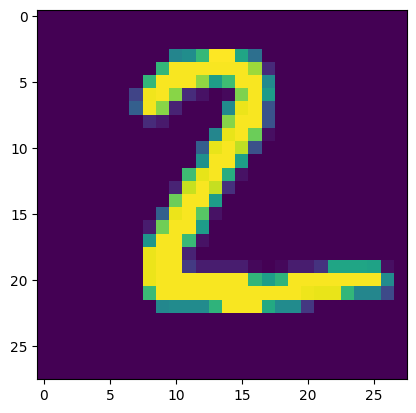

1


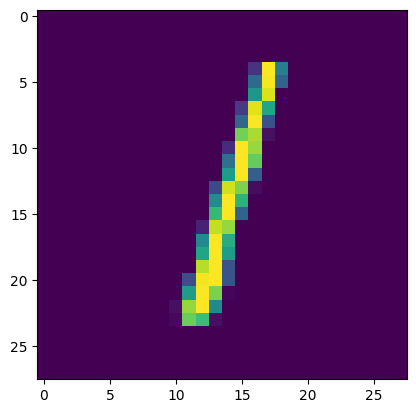

0


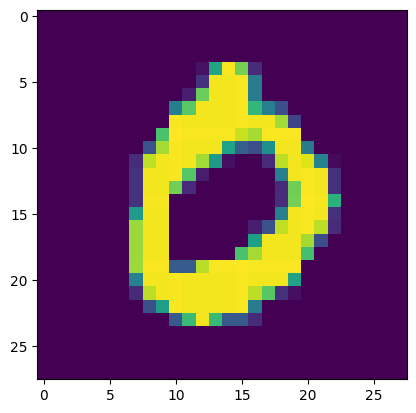

4


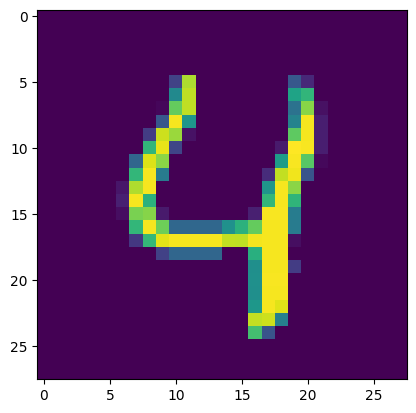

In [19]:
show4(train_loader)  # Show 5 sample images from the training set
show4(test_loader)   # Show 5 sample images from the test set

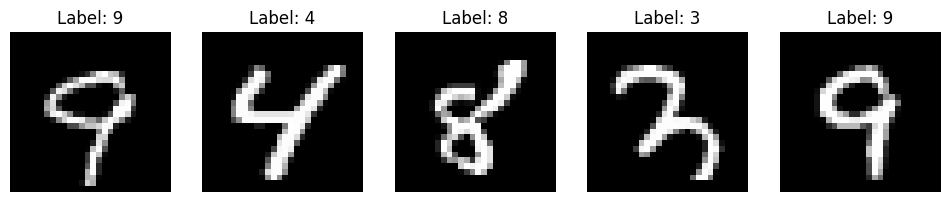

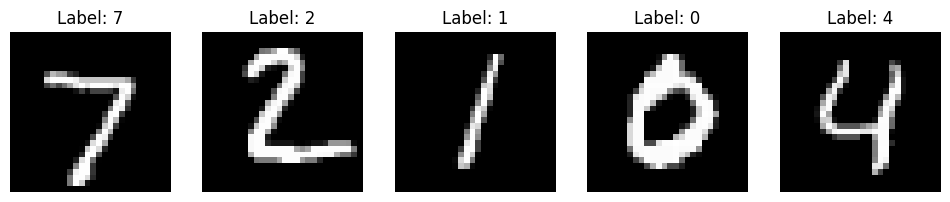

In [16]:

# i update the function for better view
def show5(data_loader):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)  

    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i, ax in enumerate(axes):
        image = images[i].numpy().squeeze()
        label = labels[i].item()
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')

    plt.show()

# Show 5 sample images from the training set
show5(train_loader)

# Show 5 sample images from the test set
show5(test_loader)

# building neural network 

In [20]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()  # Flatten layer to convert 2D image data to 1D before feeding into the fully connected layers
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (28x28 flattened images) -> Hidden layer with 128 units
        self.fc2 = nn.Linear(128, 64)  # First Hidden layer -> Second Hidden layer with 64 units
        self.fc3 = nn.Linear(64, 10)  # Second Hidden layer -> Output layer with 10 units (for 10 classes)

    def forward(self, x):
        x = self.flatten(x)  # Flatten the input images
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first hidden layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation to the second hidden layer
        x = self.fc3(x)  # Output layer (no activation function as it's used for classification)
        return x

# Create an instance of the SimpleNet model
model = SimpleNet()

# Print the model architecture
print(model)





SimpleNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [21]:
# loss function specification

import torch.optim as optim

# Loss function (cross-entropy loss)
criterion = nn.CrossEntropyLoss()

# Optimizer (Stochastic Gradient Descent - SGD)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Instantiate the model
model = SimpleNet()

# Print the model architecture
print(model)


SimpleNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [22]:
# Training loop
num_epochs = 10
print_every = 250  

In [25]:

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs, labels  # Move data to the device

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (batch_idx + 1) % print_every == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Loss: {running_loss / print_every:.4f}")
            running_loss = 0.0

# Finished training
print("Training finished!")

# Evaluate the model on the test set
model.eval()  
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs, labels
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

Epoch [1/10], Batch [250/938], Loss: 2.3199
Epoch [1/10], Batch [500/938], Loss: 2.3211
Epoch [1/10], Batch [750/938], Loss: 2.3228
Epoch [2/10], Batch [250/938], Loss: 2.3215
Epoch [2/10], Batch [500/938], Loss: 2.3208
Epoch [2/10], Batch [750/938], Loss: 2.3209
Epoch [3/10], Batch [250/938], Loss: 2.3212
Epoch [3/10], Batch [500/938], Loss: 2.3223
Epoch [3/10], Batch [750/938], Loss: 2.3205
Epoch [4/10], Batch [250/938], Loss: 2.3231
Epoch [4/10], Batch [500/938], Loss: 2.3189
Epoch [4/10], Batch [750/938], Loss: 2.3215
Epoch [5/10], Batch [250/938], Loss: 2.3196
Epoch [5/10], Batch [500/938], Loss: 2.3233
Epoch [5/10], Batch [750/938], Loss: 2.3204
Epoch [6/10], Batch [250/938], Loss: 2.3207
Epoch [6/10], Batch [500/938], Loss: 2.3214
Epoch [6/10], Batch [750/938], Loss: 2.3202
Epoch [7/10], Batch [250/938], Loss: 2.3218
Epoch [7/10], Batch [500/938], Loss: 2.3201
Epoch [7/10], Batch [750/938], Loss: 2.3208
Epoch [8/10], Batch [250/938], Loss: 2.3217
Epoch [8/10], Batch [500/938], L

In [26]:
# Evaluate the model on the test set and compute accuracy
model.eval()  
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs, labels
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1) 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

Accuracy on the test set: 9.57%


# saving the model

In [33]:
torch.save(model.state_dict(), "ashishtraineddmodel.pt")